In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from windrose import WindroseAxes

In [12]:
# read your csv file
df = pd.read_csv("../data/benin-malanville.csv")

In [ ]:
# Overview of numeric columns
print("The description of the numeric columns:")
print(df.describe())
# Overview of categorical columns
print("---------------------------------")
print("The description of the categorical columns:")
print(df.describe(include=['object']))
# Overview of all columns
print("---------------------------------")
print("The description of all columns:")
print(df.describe(include='all'))
# Overview of the dataset
print("---------------------------------")
print("An overview of the dataset: the first 5 rows")
print(df.head())
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: the last 5 rows")
print(df.tail())
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: a random sample of 5 rows")
print(df.sample(5))
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: the shape of the dataset")
print(df.info())
# Check for missing values
print("----------------------------------")
print("Check for missing values:")
print(df.isna().sum())

In [ ]:
all_numeric_columns = df.select_dtypes(include='number').columns.tolist()
print(all_numeric_columns)

['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


In [23]:
# missing summaries

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing_summary = df[columns_to_check].isnull().sum()

print(missing_summary)

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [ ]:
# 2. Compute Z-scores and flag outliers
z_scores = df[columns_to_check].apply(stats.zscore)
outliers = (np.abs(z_scores) > 3)
outlier_rows = df[outliers.any(axis=1)]
print(f"Number of rows with outliers (|Z| > 3): {outlier_rows.shape[0]}")

Number of rows with outliers (|Z| > 3): 7740


In [25]:
# 1. Handle outliers
for col in columns_to_check:
    df.loc[outliers[col], col] = df[col].median()

# 2. Fill any remaining missing values
df[columns_to_check] = df[columns_to_check].fillna(df[columns_to_check].median())


In [ ]:
output_path = "../data/benin_clean.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned data exported to {output_path}")


Cleaned data exported to ../data/benin_clean.csv


In [3]:
cdf = pd.read_csv("../data/benin_clean.csv")

In [ ]:
sns.set(style="whitegrid", palette="tab10")
plt.figure(figsize=(15, 6))

cdf['Timestamp'] = pd.to_datetime(cdf['Timestamp'])

for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(cdf['Timestamp'], cdf[col], label=col, alpha=0.7)

plt.title("Time Series of GHI, DNI, DHI, Tamb")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


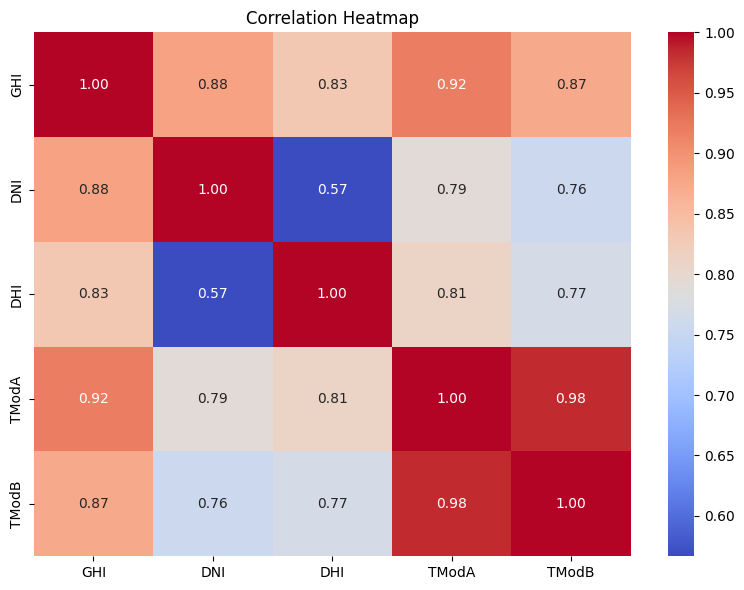

In [6]:
# correlation map

plt.figure(figsize=(8, 6))
sns.heatmap(cdf[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


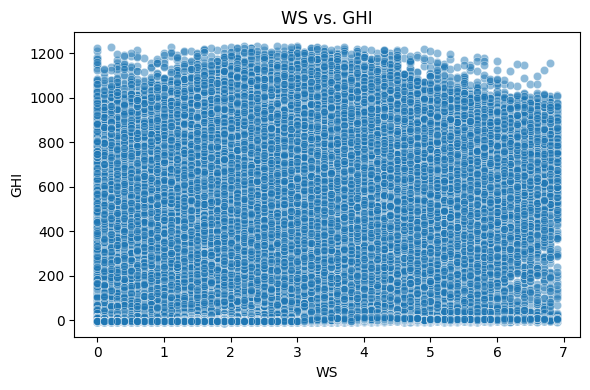

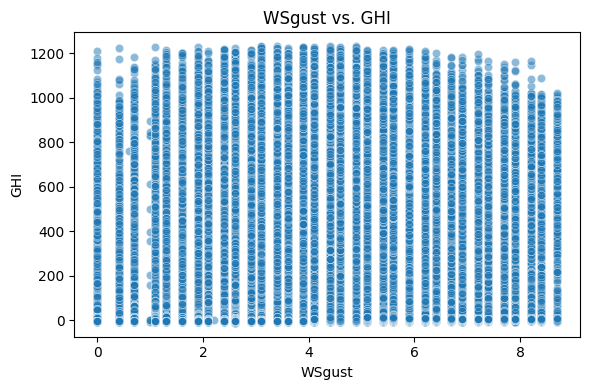

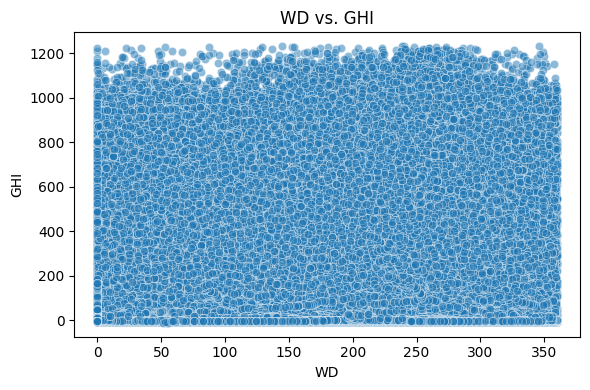

In [8]:
# scatter plots

for col in ['WS', 'WSgust', 'WD']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=cdf, x=col, y='GHI', alpha=0.5)
    plt.title(f'{col} vs. GHI')
    plt.tight_layout()
    plt.show()


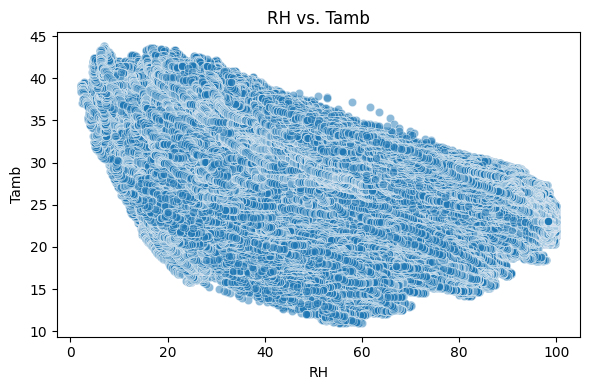

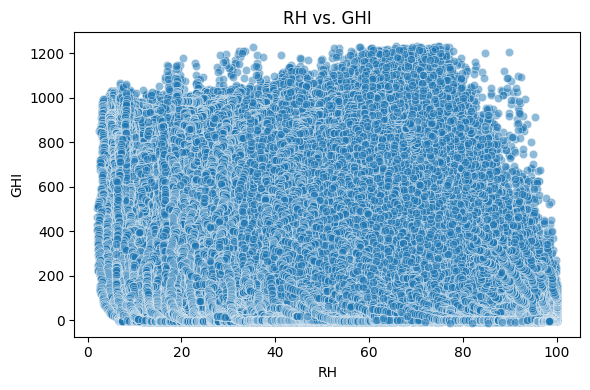

In [9]:
for target in ['Tamb', 'GHI']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=cdf, x='RH', y=target, alpha=0.5)
    plt.title(f'RH vs. {target}')
    plt.tight_layout()
    plt.show()


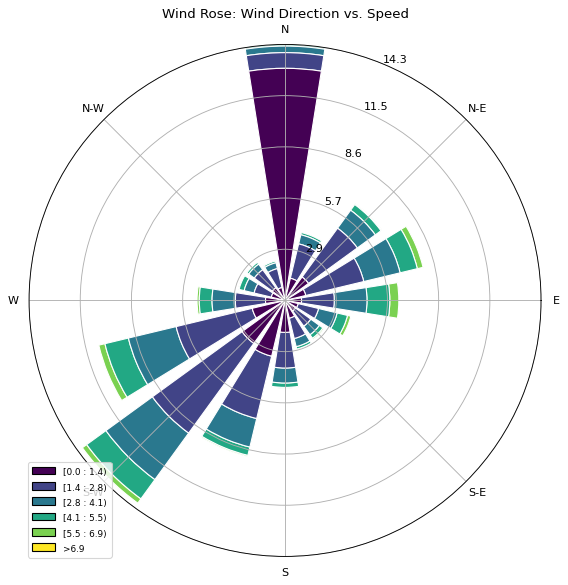

In [10]:
ax = WindroseAxes.from_ax()
ax.bar(cdf['WD'], cdf['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose: Wind Direction vs. Speed')
ax.set_legend()
plt.show()


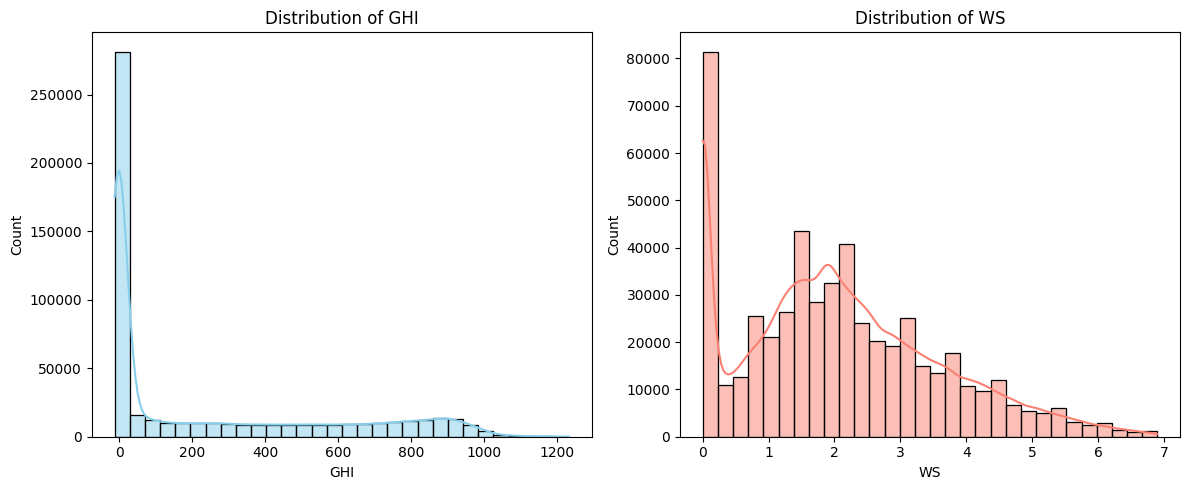

In [11]:
plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
sns.histplot(cdf['GHI'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of GHI")

# Histogram for WS
plt.subplot(1, 2, 2)
sns.histplot(cdf['WS'], kde=True, bins=30, color='salmon')
plt.title("Distribution of WS")

plt.tight_layout()
plt.show()
